In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [3]:
data = pd.read_csv('antfile17.csv')

In [4]:
bug_count = data['bug'].value_counts()
print("Initial bug distribution:\n", bug_count)

Initial bug distribution:
 0    579
1    166
Name: bug, dtype: int64


In [5]:
X = data.drop('bug', axis=1)
y = data['bug']

In [7]:
if bug_count[0] != bug_count[1]:
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
else:
    X_res, y_res = X, y

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42, stratify=y_res)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
nn_model = Sequential()
nn_model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
nn_history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_data=(X_test_scaled, y_test))

Epoch 1/50
87/87 [==============================] - 1s 3ms/step - loss: 0.6512 - accuracy: 0.6244 - val_loss: 0.6166 - val_accuracy: 0.6759
Epoch 2/50
87/87 [==============================] - 0s 1ms/step - loss: 0.5327 - accuracy: 0.7569 - val_loss: 0.5582 - val_accuracy: 0.6966
Epoch 3/50
87/87 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.7800 - val_loss: 0.5494 - val_accuracy: 0.7000
Epoch 4/50
87/87 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.8007 - val_loss: 0.5408 - val_accuracy: 0.7483
Epoch 5/50
87/87 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8053 - val_loss: 0.5485 - val_accuracy: 0.7345
Epoch 6/50
87/87 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8168 - val_loss: 0.5474 - val_accuracy: 0.7379
Epoch 7/50
87/87 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8203 - val_loss: 0.5452 - val_accuracy: 0.7483
Epoch 8/50
87/87 [==

In [12]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [13]:
nn_train_loss, nn_train_acc = nn_model.evaluate(X_train_scaled, y_train)
nn_test_loss, nn_test_acc = nn_model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Training Accuracy: {nn_train_acc:.4f}")
print(f"Neural Network Testing Accuracy: {nn_test_acc:.4f}")

10/10 [==============================] - 0s 990us/step - loss: 0.5611 - accuracy: 0.8069
Neural Network Training Accuracy: 0.9608
Neural Network Testing Accuracy: 0.8069


In [14]:
nn_y_pred = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")

10/10 [==============================] - 0s 1ms/step


In [15]:
svm_train_acc = svm_model.score(X_train_scaled, y_train)
svm_test_acc = svm_model.score(X_test_scaled, y_test)
print(f"SVM Training Accuracy: {svm_train_acc:.4f}")
print(f"SVM Testing Accuracy: {svm_test_acc:.4f}")

SVM Training Accuracy: 0.8145
SVM Testing Accuracy: 0.7552


In [16]:
svm_y_pred = svm_model.predict(X_test_scaled)

In [17]:
print("\nAccuracy Comparison:")
print(f"Neural Network Test Accuracy: {nn_test_acc:.4f}")
print(f"SVM Test Accuracy: {svm_test_acc:.4f}")


Accuracy Comparison:
Neural Network Test Accuracy: 0.8069
SVM Test Accuracy: 0.7552


In [18]:
print("\nNeural Network Classification Report:\n", classification_report(y_test, nn_y_pred))
nn_cm = confusion_matrix(y_test, nn_y_pred)


Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       145
           1       0.84      0.75      0.80       145

    accuracy                           0.81       290
   macro avg       0.81      0.81      0.81       290
weighted avg       0.81      0.81      0.81       290



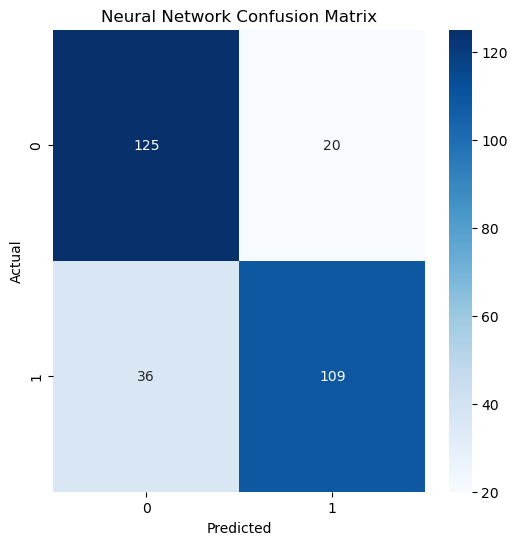

In [19]:
plt.figure(figsize=(6,6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
print("\nSVM Classification Report:\n", classification_report(y_test, svm_y_pred))
svm_cm = confusion_matrix(y_test, svm_y_pred)


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       145
           1       0.80      0.68      0.74       145

    accuracy                           0.76       290
   macro avg       0.76      0.76      0.75       290
weighted avg       0.76      0.76      0.75       290



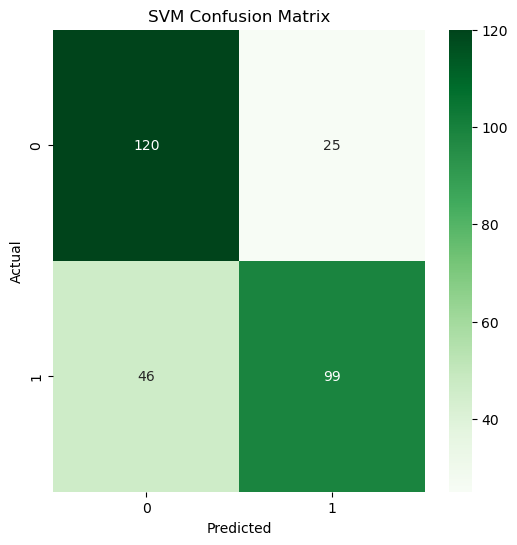

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_y_pred)
nn_roc_auc = auc(nn_fpr, nn_tpr)

In [25]:
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
svm_roc_auc = auc(svm_fpr, svm_tpr)

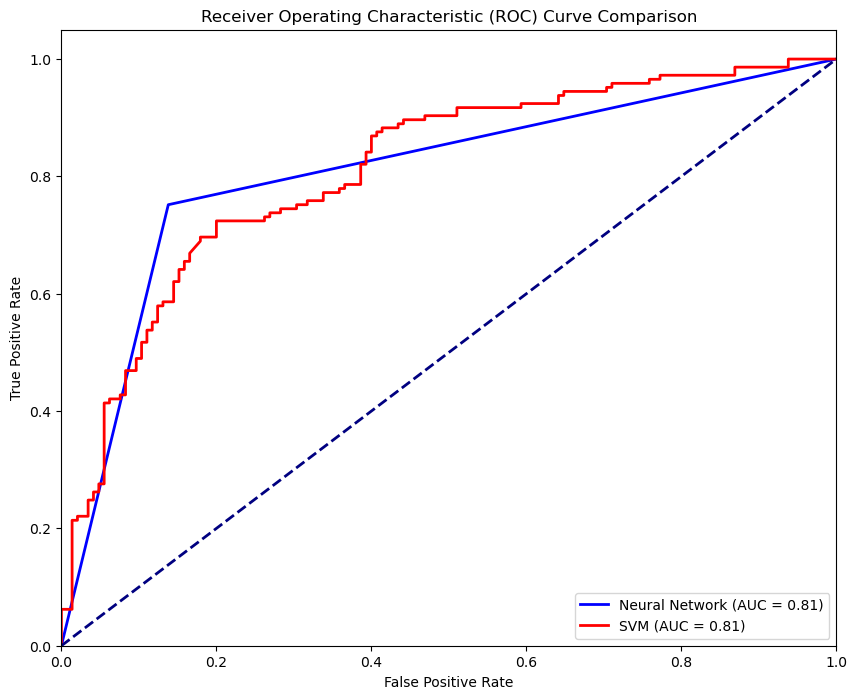

In [26]:
plt.figure(figsize=(10,8))
plt.plot(nn_fpr, nn_tpr, color='blue', lw=2, label=f'Neural Network (AUC = {nn_roc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='red', lw=2, label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()